In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

In [ ]:
import chardet

# Detect the encoding of the file
with open('/content/zomato.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")


Detected encoding: MacRoman


<ipython-input-6-5b10d7bf023c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


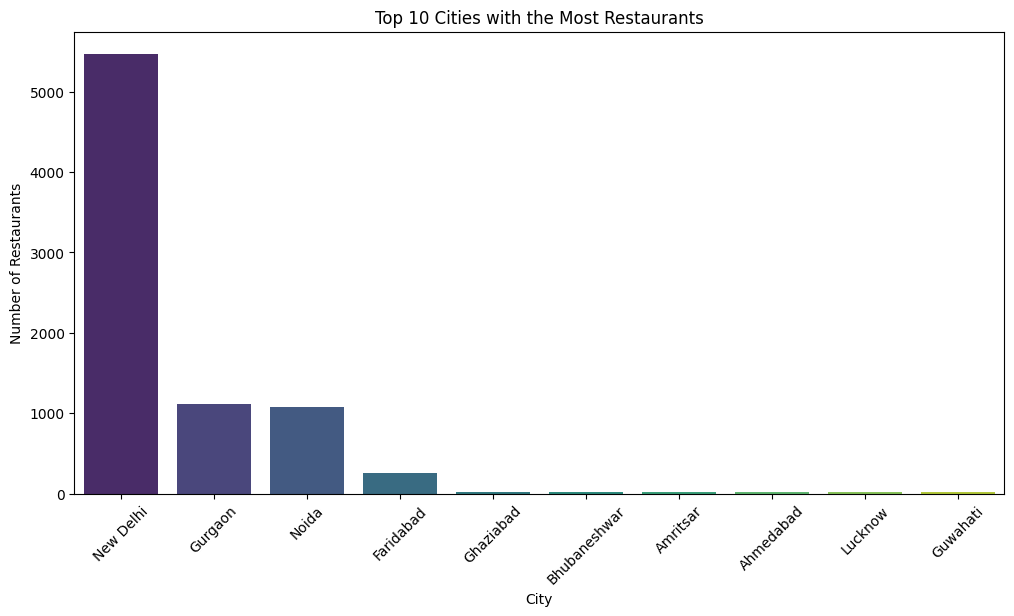

<ipython-input-6-5b10d7bf023c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='plasma')


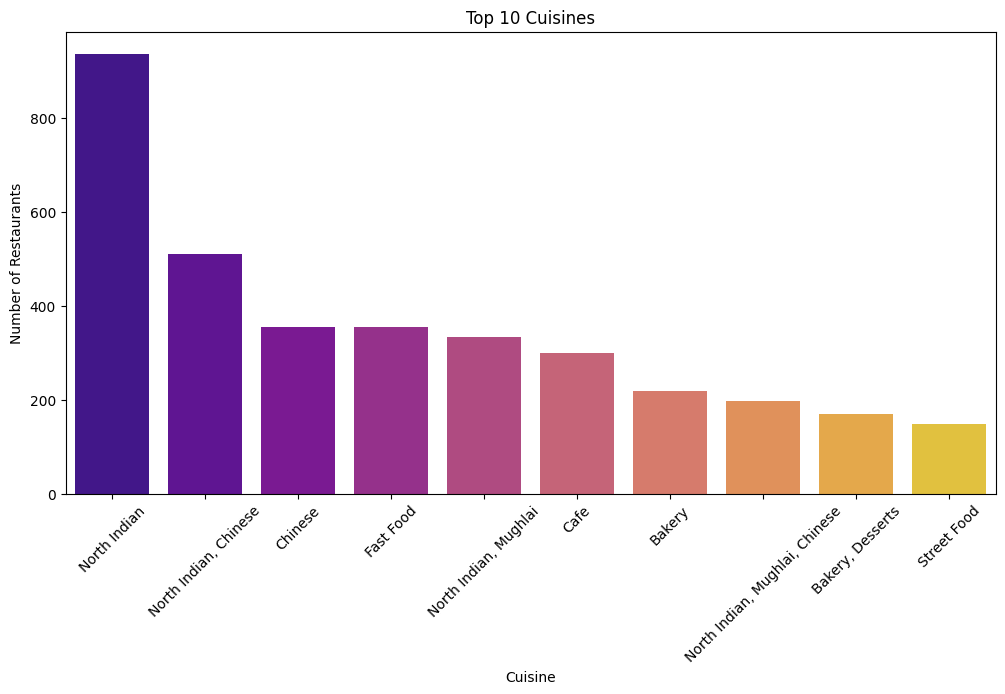

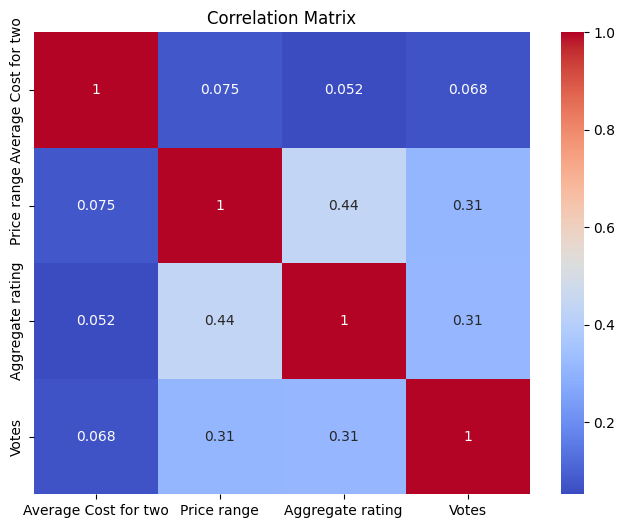

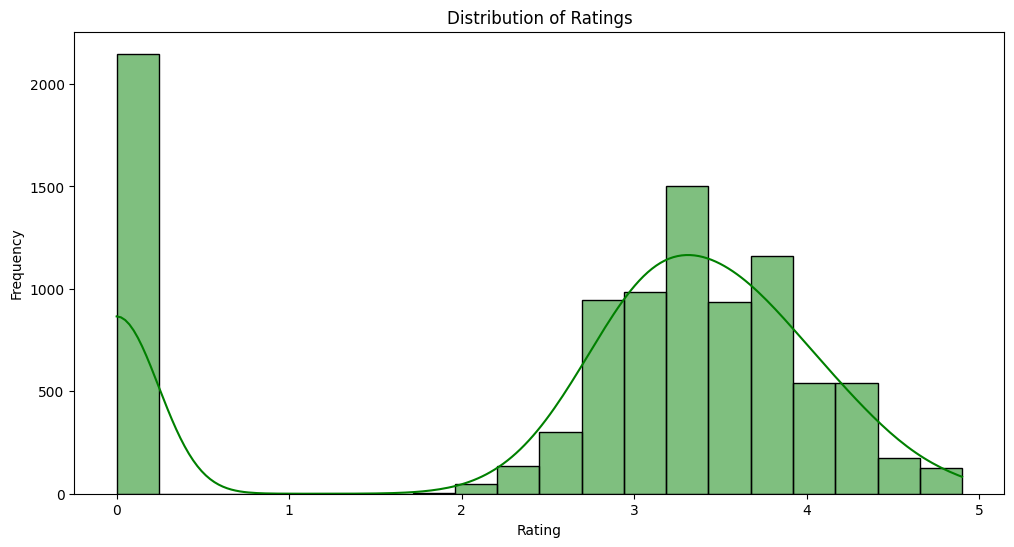

<ipython-input-6-5b10d7bf023c>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Restaurant Name', data=top_rated, palette='magma')


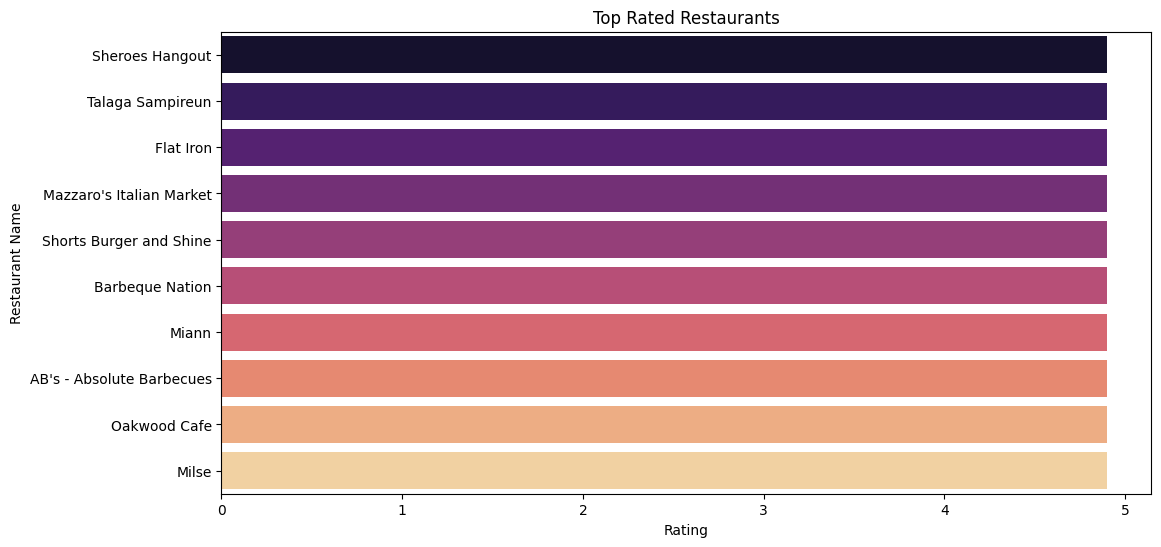

<ipython-input-6-5b10d7bf023c>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_delivery.index, y=online_delivery.values, palette='Set2')


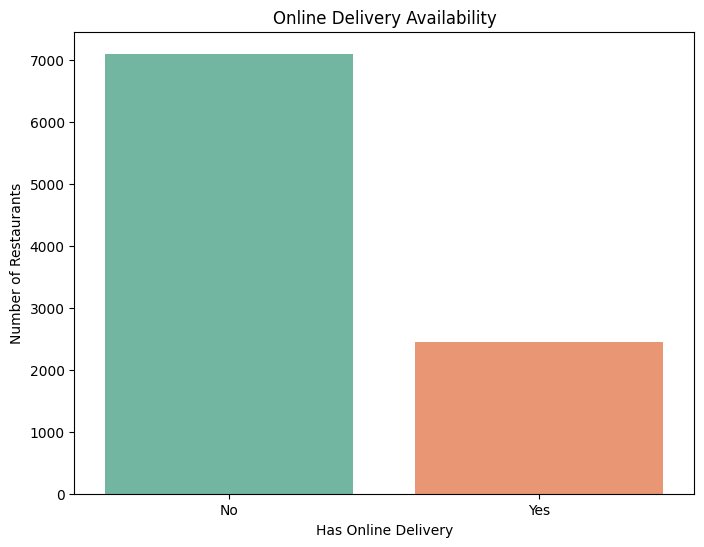

<ipython-input-6-5b10d7bf023c>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_booking.index, y=table_booking.values, palette='Set3')


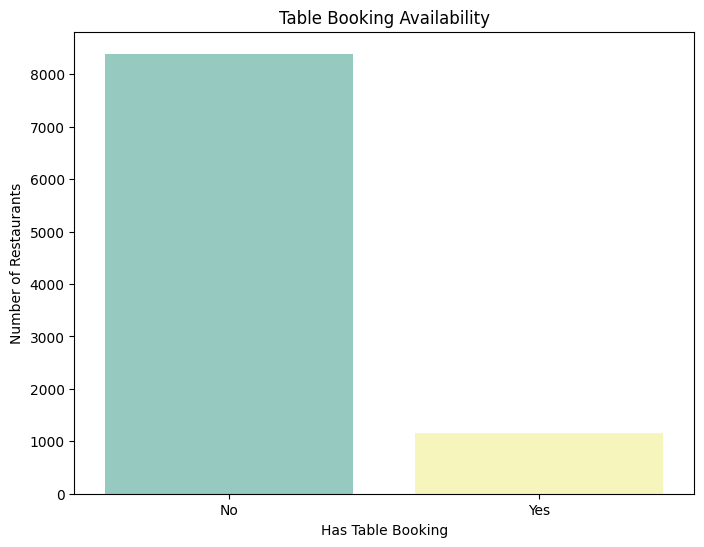

<ipython-input-6-5b10d7bf023c>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range.index, y=price_range.values, palette='cool')


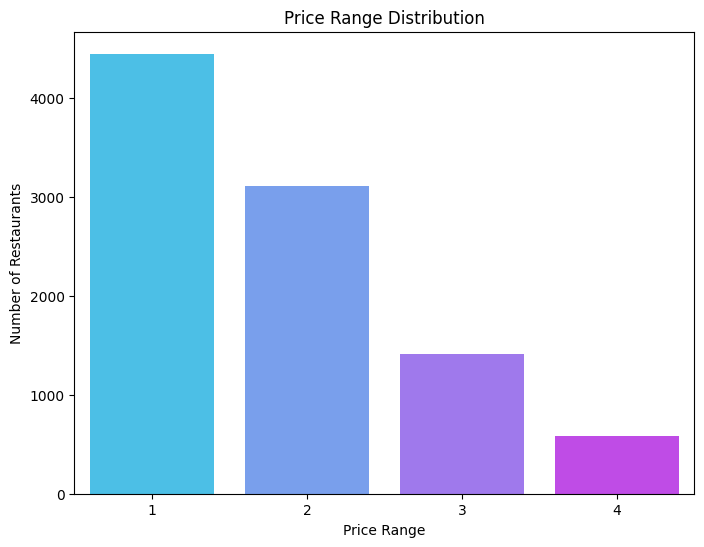

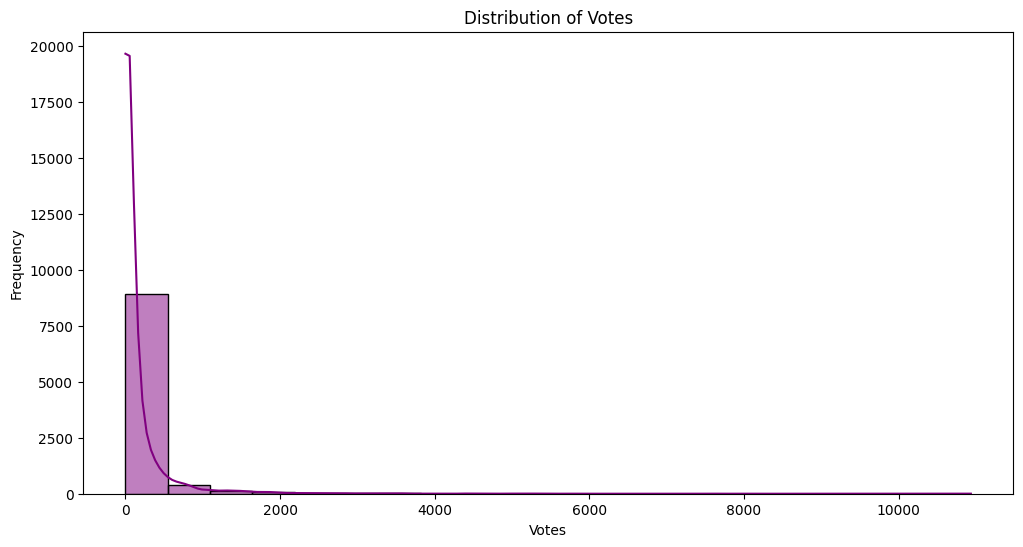

<ipython-input-6-5b10d7bf023c>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities.values, y=top_localities.index, palette='Blues_r')


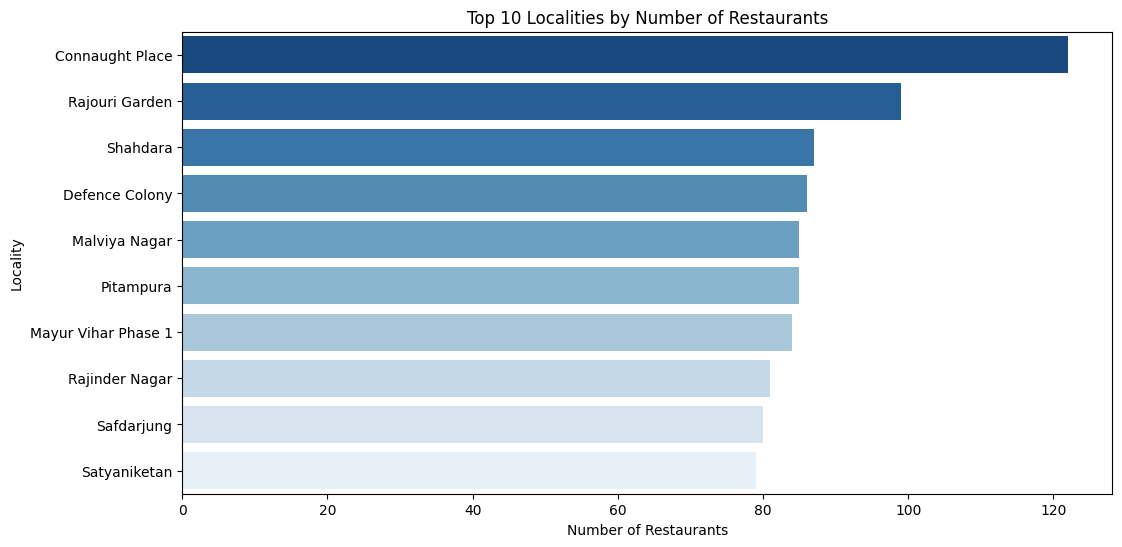

<ipython-input-6-5b10d7bf023c>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities_rating.values, y=top_localities_rating.index, palette='Oranges_r')


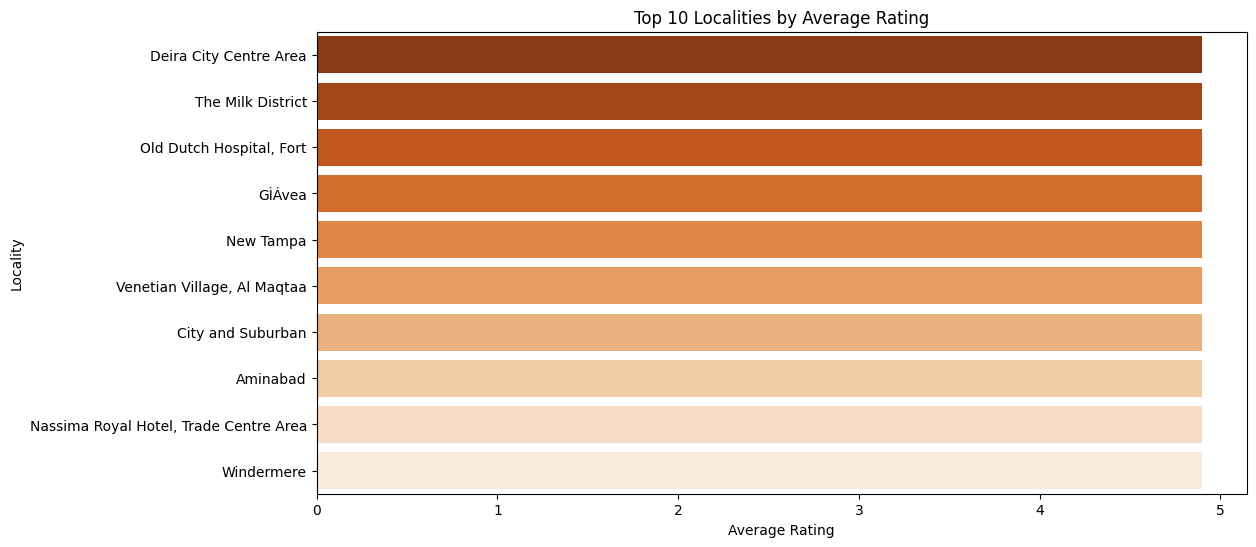

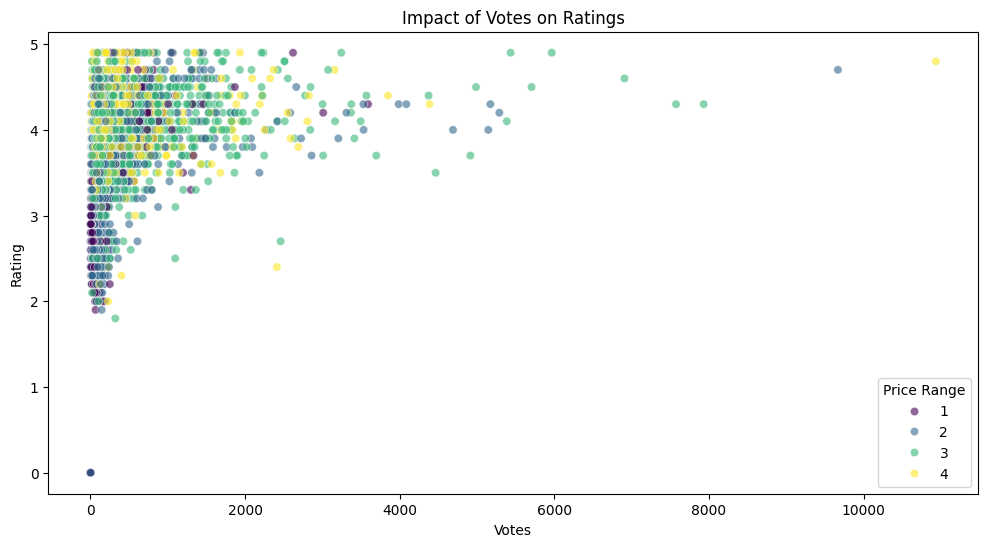

<ipython-input-6-5b10d7bf023c>:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Average Cost for two', data=df, palette='Set1')


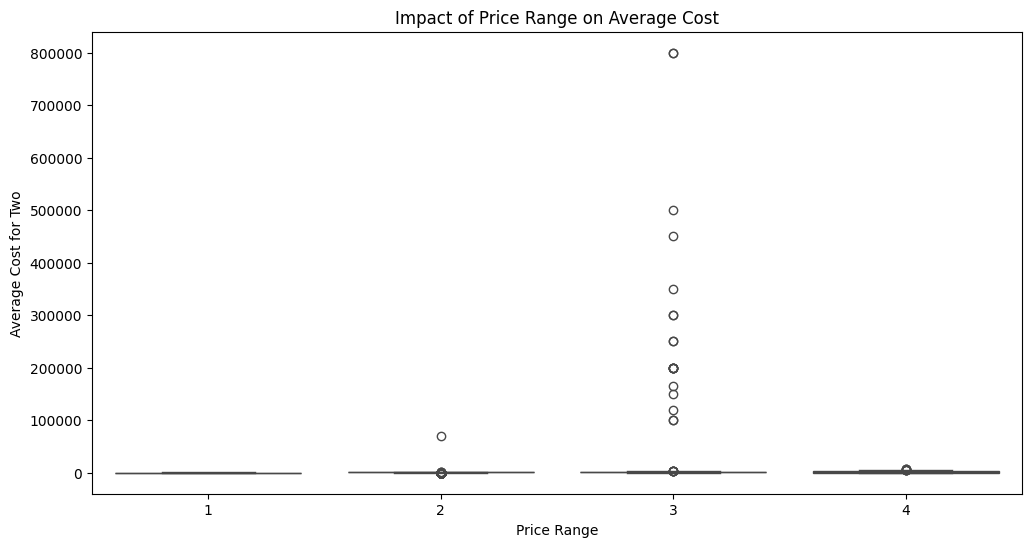

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the dataset with the detected encoding
dataset_path = '/content/zomato.csv'  # Path to your dataset file
df = pd.read_csv(dataset_path, encoding=encoding)

# Data Cleaning
df.fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)

# Distribution of Restaurants by City
plt.figure(figsize=(12, 6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with the Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Cuisine Analysis
plt.figure(figsize=(12, 6))
top_cuisines = df['Cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='plasma')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Geospatial Analysis
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
zomato_map = folium.Map(location=map_center, zoom_start=5)
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']}\nRating: {row['Aggregate rating']}\nCost for Two: {row['Average Cost for two']}",
        icon=folium.Icon(color='blue' if row['Aggregate rating'] >= 4 else 'red')
    ).add_to(zomato_map)
zomato_map.save('zomato_map.html')

#  Correlation Analysis
plt.figure(figsize=(8, 6))
numeric_columns = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#  Top Rated Restaurants
plt.figure(figsize=(12, 6))
top_rated = df[df['Aggregate rating'] >= 4.5][['Restaurant Name', 'Aggregate rating']].sort_values(by='Aggregate rating', ascending=False).head(10)
sns.barplot(x='Aggregate rating', y='Restaurant Name', data=top_rated, palette='magma')
plt.title('Top Rated Restaurants')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.show()

#  Online Delivery Availability
plt.figure(figsize=(8, 6))
online_delivery = df['Has Online delivery'].value_counts()
sns.barplot(x=online_delivery.index, y=online_delivery.values, palette='Set2')
plt.title('Online Delivery Availability')
plt.xlabel('Has Online Delivery')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

#  Table Booking Availability
plt.figure(figsize=(8, 6))
table_booking = df['Has Table booking'].value_counts()
sns.barplot(x=table_booking.index, y=table_booking.values, palette='Set3')
plt.title('Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

#  Price Range Distribution
plt.figure(figsize=(8, 6))
price_range = df['Price range'].value_counts().sort_index()
sns.barplot(x=price_range.index, y=price_range.values, palette='cool')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

#  Votes Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Votes'], bins=20, kde=True, color='purple')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

#  Restaurant Density by Locality
plt.figure(figsize=(12, 6))
top_localities = df['Locality'].value_counts().head(10)
sns.barplot(x=top_localities.values, y=top_localities.index, palette='Blues_r')
plt.title('Top 10 Localities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')
plt.show()

#  Top Localities by Average Rating
plt.figure(figsize=(12, 6))
top_localities_rating = df.groupby('Locality')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_localities_rating.values, y=top_localities_rating.index, palette='Oranges_r')
plt.title('Top 10 Localities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Locality')
plt.show()

#  Impact of Votes on Ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, hue='Price range', palette='viridis', alpha=0.6)
plt.title('Impact of Votes on Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.legend(title='Price Range')
plt.show()

#  Impact of Price Range on Average Cost
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Average Cost for two', data=df, palette='Set1')
plt.title('Impact of Price Range on Average Cost')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.show()
